<a href="https://colab.research.google.com/github/spierscaleb004/4410-HW/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


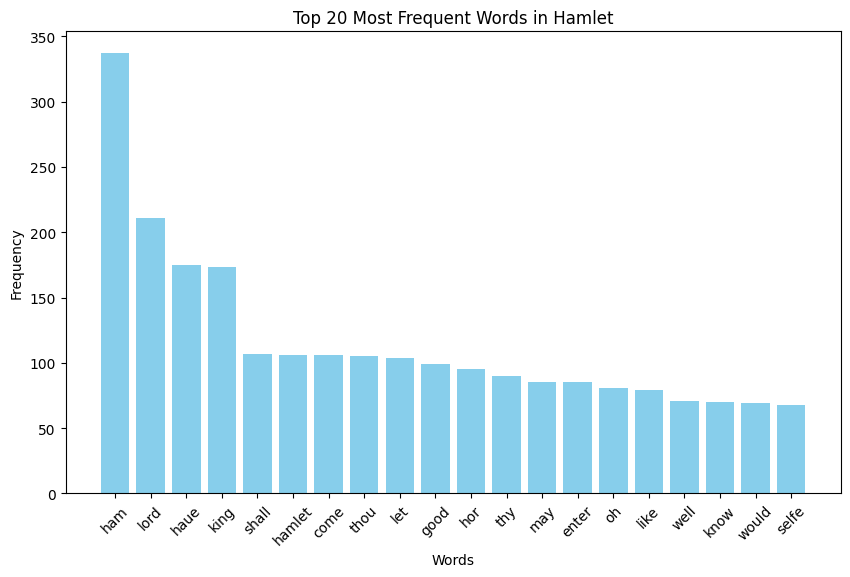

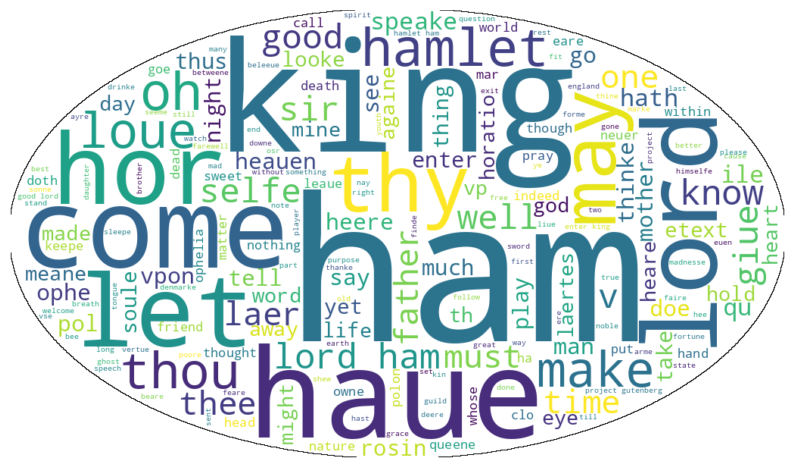

In [6]:


import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import imageio.v3 as iio
import requests


import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'

response = requests.get(target_url)

data = response.text

blob=TextBlob(data)

# Lowercase
words = [word.lower() for word in blob.words]

# Stopwords
stop_words = set(stopwords.words('english'))

filtered_words = [w for w in words if w.isalpha() and w not in stop_words]

# Obtain word frequencies
from collections import Counter

word_counts = Counter(filtered_words)

top20 = word_counts.most_common(20)

# Make the bar chart
labels, values = zip(*top20)
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Hamlet')
plt.xticks(rotation=45)
plt.show()

# Generate Word Cloud
image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = iio.imread(image_file)
wc = WordCloud(width=800, height=800,
               background_color='white',
               mask=mask_image,
               contour_width=1,
               contour_color='black').generate(" ".join(filtered_words))

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
